## Automatic Learning of Summary Statistics for Approximate Bayesian Computation Using Deep Learning

Samuel Wiqvist, Lund University

Work with: Pierre-Alexandre Mattei (ITU), Umberto Picchini (GU/Chalmers), Jes Frellsen (ITU). 

In [1]:
# load packages and set up
using PyPlot
using Distributions
using Printf
using Random 
using KernelDensity

α = 2; β = 2
Random.seed!(0)
m = 4; n = 5; p = 0.7
data_model = Binomial(m,p)
y = rand(data_model,n) # generate data

posterior = Beta(α + sum(y), β + m*n - sum(y));


## ABC rejection sampling for the Beta-Binomial model 

In [3]:
# Define the model and the prior distribution.

Random.seed!(0);

# data model
m = 4; n = 5; p = 0.7
y = rand(Binomial(m,p),n) # generate data

# prior 
α = 2; β = 2
prior = Beta(2,2);

## ABC rejection sampling for the Beta-Binomial model 

In [4]:
# ABC rejection sampling algorithm 
function abc_rs(nbr_propsals::Int, ϵ::Real)
    
    abc_posterior_samples = zeros(nbr_propsals)
    nbr_accapted_proposals = 0 
    
    for i in 1:nbr_propsals
    
        θ_star = rand(prior) # sample parameter proposal from prior 
        y_star = rand(data_model,n) # generate data from the data model
        Δ = sum(abs.(sort(y_star)-sort(y))) # compute ABC distance      
        
        if Δ <= ϵ # accapte proposal 
            nbr_accapted_proposals += 1 
            abc_posterior_samples[nbr_accapted_proposals] = θ_star 
        end 
    end 
    
    return abc_posterior_samples[1:nbr_accapted_proposals]

end 

abc_rs (generic function with 1 method)

## ABC rejection sampling for the Beta-Binomial model 

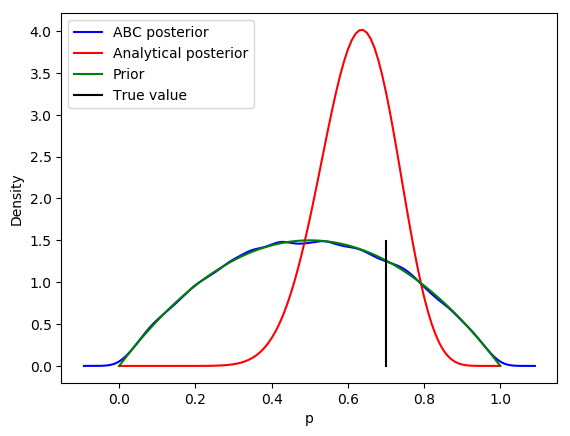

PyObject <matplotlib.legend.Legend object at 0x7f0a59e25da0>

In [5]:
# Run ABC rejection sampling
abc_posterior_samples = abc_rs(10^6, 0);

kde_approx_posterior = kde(abc_posterior_samples)

# plot results
PyPlot.figure()
PyPlot.plot(kde_approx_posterior.x,kde_approx_posterior.density, "b")
PyPlot.plot(0:0.01:1,pdf.(posterior, 0:0.01:1), "r")
PyPlot.plot(0:0.01:1, pdf.(prior, 0:0.01:1), "g")
PyPlot.plot((p, p), (0, maximum(kde_approx_posterior.density)), "k")
PyPlot.xlabel("p")
PyPlot.ylabel("Density")
PyPlot.legend(["ABC posterior"; "Analytical posterior"; "Prior"; "True value"])

In [59]:
std(abc_posterior_samples)

0.22607833893321394

## new section

In [40]:
a = 5^2 

25

## The end

Homepage: http://www.maths.lu.se/staff/samuel-wiqvist/

Github: SamuelWiqvist

Twitter: samuel_wiqvist

Outline 

* Intro to ABC with simple Beta-Bionomial model (we will only have one simple example since it is really annoying to create the slides for the code examples)
* Something on summary statistics 
* Why we want the PEN network 
* How the PEN network works, why it is particular suitable for timeseries 
* Something on our results (MA2 model with noise)